When exploring a large set of documents -- such as Wikipedia, news articles, StackOverflow, etc. -- it can be useful to get a list of related material. To find relevant documents you typically
* Decide on a notion of similarity
* Find the documents that are most similar

In the assignment you will
* Gain intuition for different notions of similarity and practice finding similar documents.
* Explore the tradeoffs with representing documents using raw word counts and TF-IDF
* Explore the behavior of different distance metrics by looking at the Wikipedia pages most similar to President Obamaâs page.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

## Load Wikipedia dataset

We will be using the dataset of abridged Wikipedia pages. Each element of the dataset consists of a link to the wikipedia article, the name of the person, and the text of the article (in lowercase).  

In [2]:
wiki = pd.read_csv('people_wiki.csv')
wiki.head()

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...


If you want to check whether the text on the webpage agrees with the one here, you can display it with the following code:

In [3]:
 from IPython.display import HTML
 print(wiki['text'][0])
 HTML(url=wiki['URI'][0])

digby morrell born 10 october 1979 is a former australian rules footballer who played with the kangaroos and carlton in the australian football league aflfrom western australia morrell played his early senior football for west perth his 44game senior career for the falcons spanned 19982000 and he was the clubs leading goalkicker in 2000 at the age of 21 morrell was recruited to the australian football league by the kangaroos football club with its third round selection in the 2001 afl rookie draft as a forward he twice kicked five goals during his time with the kangaroos the first was in a losing cause against sydney in 2002 and the other the following season in a drawn game against brisbaneafter the 2003 season morrell was traded along with david teague to the carlton football club in exchange for corey mckernan he played 32 games for the blues before being delisted at the end of 2005 he continued to play victorian football league vfl football with the northern bullants carltons vflaf

Property,Value
dbo:Person/height,191.0 (dbd:centimetre)
dbo:Person/weight,97.0 (dbd:kilogram)
dbo:abstract,"Digby Morrell (born 10 October 1979) is a former Australian rules footballer who played with the Kangaroos and Carlton in the Australian Football League (AFL). From Western Australia, Morrell played his early senior football for West Perth. His 44-game senior career for the Falcons spanned 1998–2000, and he was the club's leading goalkicker in 2000. At the age of 21, Morrell was recruited to the Australian Football League by the Kangaroos Football Club with its third round selection in the 2001 AFL Rookie Draft. As a forward he twice kicked five goals during his time with the Kangaroos. The first was in a losing cause against Sydney in 2002 and the other the following season in a drawn game against Brisbane. After the 2003 season, Morrell was traded, along with David Teague, to the Carlton Football Club in exchange for Corey McKernan. He played 32 games for the Blues before being delisted at the end of 2005. He continued to play Victorian Football League (VFL) football with the Northern Bullants, Carlton's VFL-affiliate in 2006, and acted as playing assistant coach in 2007. In 2008, he shifted to the Box Hill Hawks, before retiring from playing at the end of the season. From 2009 until 2013, Morrell was the senior coach of the Strathmore Football Club in the Essendon District Football League, leading the club to the 2011 Premier Division premiership.from 2014 - 2018 he was the senior coach of the West Coburg Football Club, also in the EDFL.In September 2018 he was appointed new coach of the Pascoe Vale Football Club. He currently teaches physical education at the Parade College Bundoora campus in Melbourne. (en)"
dbo:birthDate,1979-10-10 (xsd:date)
dbo:careerStation,dbr:Digby_Morrell__CareerStation__1 dbr:Digby_Morrell__CareerStation__2
dbo:debutTeam,dbr:North_Melbourne_Football_Club
dbo:height,1.910000 (xsd:double)
dbo:weight,97000.000000 (xsd:double)
dbo:wikiPageID,12660423 (xsd:integer)
dbo:wikiPageLength,4013 (xsd:nonNegativeInteger)


## Ex. 1: Extract word count vectors

As we have seen in Assignment 4, we can extract word count vectors using `CountVectorizer` function.
- make sure you include words of unit length by using the parameter: `token_pattern=r"(?u)\b\w+\b"`
- do not use any stopwords
- take 10000 most frequent words in the corpus
- explicitly take all the words independent of in how many documents they occur
- obtain the matrix of word counts

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    token_pattern=r"(?u)\b\w+\b",
    stop_words=None,
    max_features=10000
)
WCmatrix = vectorizer.fit_transform(wiki['text'])
WCmatrix_array = WCmatrix.toarray()
feature_names = vectorizer.get_feature_names_out()

# Output results
print("Word Count Matrix:\n", WCmatrix_array)
print("Feature Names:\n", feature_names)

Word Count Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Feature Names:
 ['0' '01' '1' ... 'zoology' 'zrich' 'zurich']


## Ex. 2: Find nearest neighbors

**a)** Start by finding the nearest neighbors of the Barack Obama page using the above word count matrix to represent the articles and **Euclidean** distance to measure distance.
Save the distances in `wiki['BO-eucl']` and look at the top 10 nearest neighbors.

Norma euklidesowa

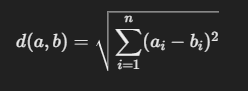

In [5]:
# One can use the following:
    # from sklearn.neighbors import NearestNeighbors
    # nbrs = NearestNeighbors(n_neighbors=3, algorithm='brute',metric='euclidean').fit(X.toarray())
    # distances, indices = nbrs.kneighbors(X.toarray())
# but here let's use:
from sklearn.metrics import pairwise_distances

obama_index=wiki[wiki['name']=='Barack Obama'].index[0]#pobranie pierwszego indeksu rekordu
                                                       #ktory zawiera w kolumnie name 'Barack Obama'
dist = pairwise_distances(WCmatrix_array,WCmatrix_array[obama_index].reshape(1,-1),metric='euclidean')
#pairwise_distances sluzy do obliczania odległości między każdą parą wierszy z dwóch macierzy.
#bierzemy do tej funkcji cala macierz vectorizer, element z vectorizer z indeksem obamy zmienony
# do macierzy 2d(wymog tej biblioteki, i metryka euklidesowa)
wiki['BO-eucl'] = dist
wiki_sorted = wiki.sort_values(by='BO-eucl')
wiki_sorted.head(10)


,URI,name,text,BO-eucl
35817,<http://dbpedia.org/resource/Barack_Obama>,Barack Obama,barack hussein obama ii brk husen bm born augu...,0.000000
24478,<http://dbpedia.org/resource/Joe_Biden>,Joe Biden,joseph robinette joe biden jr dosf rbnt badn b...,31.336879
28447,<http://dbpedia.org/resource/George_W._Bush>,George W. Bush,george walker bush born july 6 1946 is an amer...,33.645208
48202,<http://dbpedia.org/resource/Tony_Vaccaro>,Tony Vaccaro,michelantonio celestino onofrio vaccaro born d...,33.734256
14754,<http://dbpedia.org/resource/Mitt_Romney>,Mitt Romney,willard mitt romney born march 12 1947 is an a...,34.351128
31423,<http://dbpedia.org/resource/Walter_Mondale>,Walter Mondale,walter frederick fritz mondale born january 5 ...,34.423829
36364,<http://dbpedia.org/resource/Don_Bonker>,Don Bonker,don leroy bonker born march 7 1937 in denver c...,34.597688
13229,<http://dbpedia.org/resource/Francisco_Barrio>,Francisco Barrio,francisco javier barrio terrazas born november...,34.669872
35357,<http://dbpedia.org/resource/Lawrence_Summers>,Lawrence Summers,lawrence henry larry summers born november 30 ...,35.383612
25258,<http://dbpedia.org/resource/Marc_Ravalomanana>,Marc Ravalomanana,marc ravalomanana malagasy ravalumanan born 12...,35.440090


,URI,name,text,BO-eucl
35817,<http://dbpedia.org/resource/Barack_Obama>,Barack Obama,barack hussein obama ii brk husen bm born augu...,0.000000
24478,<http://dbpedia.org/resource/Joe_Biden>,Joe Biden,joseph robinette joe biden jr dosf rbnt badn b...,31.336879
28447,<http://dbpedia.org/resource/George_W._Bush>,George W. Bush,george walker bush born july 6 1946 is an amer...,33.645208
48202,<http://dbpedia.org/resource/Tony_Vaccaro>,Tony Vaccaro,michelantonio celestino onofrio vaccaro born d...,33.734256
14754,<http://dbpedia.org/resource/Mitt_Romney>,Mitt Romney,willard mitt romney born march 12 1947 is an a...,34.351128
31423,<http://dbpedia.org/resource/Walter_Mondale>,Walter Mondale,walter frederick fritz mondale born january 5 ...,34.423829
36364,<http://dbpedia.org/resource/Don_Bonker>,Don Bonker,don leroy bonker born march 7 1937 in denver c...,34.597688
13229,<http://dbpedia.org/resource/Francisco_Barrio>,Francisco Barrio,francisco javier barrio terrazas born november...,34.669872
35357,<http://dbpedia.org/resource/Lawrence_Summers>,Lawrence Summers,lawrence henry larry summers born november 30 ...,35.383612
25258,<http://dbpedia.org/resource/Marc_Ravalomanana>,Marc Ravalomanana,marc ravalomanana malagasy ravalumanan born 12...,35.440090


**b)** Measure the pairwise distance between the Wikipedia pages of Barack Obama, George W. Bush, and Joe Biden. Which of the three pairs has the smallest distance?

In [6]:
bush_index = wiki[wiki['name'] == 'George W. Bush'].index[0]
biden_index = wiki[wiki['name'] == 'Joe Biden'].index[0]

bush_vector=WCmatrix_array[bush_index]
biden_vector=WCmatrix_array[biden_index]
obama_vector=WCmatrix_array[obama_index]

obama_bush_dist = pairwise_distances([obama_vector], [bush_vector], metric='euclidean')
obama_biden_dist = pairwise_distances([obama_vector], [biden_vector], metric='euclidean')
bush_biden_dist = pairwise_distances([bush_vector], [biden_vector], metric='euclidean')

print("Distance between Obama and Bush:", obama_bush_dist[0][0])
print("Distance between Obama and Biden:", obama_biden_dist[0][0])
print("Distance between Bush and Biden:", bush_biden_dist[0][0])

Distance between Obama and Bush: 33.645207682521445
Distance between Obama and Biden: 31.336879231984796
Distance between Bush and Biden: 30.919249667480614


All of the 10 people from **a)** are politicians, but about half of them have rather tenuous connections with Obama, other than the fact that they are politicians, e.g.,

* Francisco Barrio is a Mexican politician, and a former governor of Chihuahua.
* Walter Mondale and Don Bonker are Democrats who made their career in late 1970s.

Nearest neighbors with raw word counts got some things right, showing all politicians in the query result, but missed finer and important details.

**c)** Let's find out why Francisco Barrio was considered a close neighbor of Obama.
To do this, look at the most frequently used words in each of Barack Obama and Francisco Barrio's pages.

In [7]:
def top_words(name):
    df = pd.DataFrame(columns=['word','count'])
    imie = wiki[wiki['name'] == name].index[0]
    zdanie=wiki['text'][imie].split()
    unikat=list(set(zdanie))
    for i in range(len(unikat)):
        df.loc[i] = [unikat[i],zdanie.count(unikat[i])]
    return df.sort_values(by='count',ascending=False)

In [8]:
obama_words = top_words('Barack Obama')
obama_words

,word,count
162,the,40
239,in,30
86,and,21
73,of,18
126,to,14
...,...,...
108,civil,1
109,included,1
110,full,1
112,reinvestment,1


In [9]:
barrio_words = top_words('Francisco Barrio')
barrio_words

,word,count
120,the,36
50,of,24
64,and,18
190,in,17
8,he,10
...,...,...
102,1998,1
103,leadership,1
30,2009,1
105,named,1


**d)** Extract the list of most frequent **common** words that appear in both Obama's and Barrio's documents and display the five words that appear most often in Barrio's article.

Use a dataframe operation known as **join**. The **join** operation is very useful when it comes to playing around with data: it lets you combine the content of two tables using a shared column (in this case, the index column of words). See [the documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) for more details.

In [10]:
obama_words = obama_words.rename(columns={'count': 'count_Obama'})#zamiana count w obydwu dataframe bo musza byc inne nazwy
barrio_words = barrio_words.rename(columns={'count': 'count_Barrio'})#zeby porownac

# Łączenie DataFrame na podstawie wspólnych słów
common_words = pd.merge(obama_words, barrio_words, on='word', how='inner')
common_words.sort_values(by='count_Obama', ascending=False).head(5)


,word,count_Obama,count_Barrio
0,the,40,36
1,in,30,17
2,and,21,18
3,of,18,24
4,to,14,9


Collect all words that appear both in Barack Obama and George W. Bush pages.  Out of those words, find the 10 words that show up most often in Obama's page.

In [11]:
bush_words = top_words('George W. Bush')
bush_words = bush_words.rename(columns={'count': 'count_Bush'})
porownianie=pd.merge(obama_words, bush_words, on='word', how='inner')
porownianie.sort_values(by='count_Bush', ascending=False).head(10)

,word,count_Obama,count_Bush
0,the,40,39
1,in,30,22
2,and,21,14
3,of,18,14
4,to,14,11
7,he,7,8
18,president,4,6
5,his,11,6
8,a,7,6
9,as,6,6


**Note.** Even though common words are swamping out important subtle differences, commonalities in rarer political words still matter on the margin. This is why politicians are being listed in the query result instead of musicians, for example. In the next subsection, we will introduce a different metric that will place greater emphasis on those rarer words.

**e)** Among the words that appear in both Barack Obama and Francisco Barrio, take the 15 that appear most frequently in Obama. How many of the articles in the Wikipedia dataset contain all of those 15 words? Which are they?

In [12]:
# It might be helpful to use:
word_to_ind={v: i for i, v in enumerate(vectorizer.get_feature_names_out())} # a dictionary with words as keys and indices as values
obamatop15=(common_words.head(15)['word']).tolist()
articles=[]
'''
for elemends in df:
 for word in obamatop15:
 | if word jest w tym slowniku zrobionym w 2 linijce
 | |  jezeli dany teskt kandydata nie ma wszystkich wyrazow z obamatop15 jako indeks word_to_ind
 | |  ustaw flage na false
 | jezeli nie to false
 if flage not false:
   articles add name
'''

for index, row in wiki.iterrows():  # Iterate through each row (article) of the DataFrame
    flag = True  # Set flag to True initially
    for word in obamatop15:
        if word in word_to_ind:
            word_index = word_to_ind[word]
            if WCmatrix_array[index, word_index] == 0:  # If the word is not present in the article
                flag = False  # Set flag to False
                break  # Exit inner loop since a word is missing
        else:
            flag = False  # If word not in vocabulary, set flag to False
            break  # Exit inner loop

    if flag:  # If flag is still True (all words found)
        articles.append(row['name'])  # Add article name to the list

#print(word_to_ind)
# Your code goes here


In [13]:
print("Liczba osob: ",len(articles))
print('Nazwiska osob zawierajacych 15 wyrazow co obama: ')
print(articles)


Liczba osob:  67
Nazwiska osob zawierajacych 15 wyrazow co obama: 
['Donald Fowler', 'John P. Johnson', 'polo magnate)', 'James Bilbray', 'Paul Kagame', 'Martin Olav Sabo', 'Bernard Kenny', 'Donne Trotter', 'Ronald F. Lehman', 'Stephen Douglas Mumford', 'T. Allan McArtor', 'Harry Huge', 'Robert Smith Walker', 'Morley Winograd', 'Pl%C3%A1cido Mic%C3%B3 Abogo', 'Francisco Barrio', 'Helmut Jahn', 'Mark Poloncarz', 'Charles Taylor (Liberian politician)', 'Robert K. Dellenbach', 'Bruce G. Blair', 'David P. Calleo', 'Andy Johnson-Laird', 'Leo Kunnas', 'Richard Felix Staar', 'Peter Amollo Odhiambo', 'Jonathan Fielding', 'Chung Dong-young', 'Jesse Ventura', 'Joe Biden', 'Lawrence W. Green', 'Muhammad Yunus Nawandish', 'Joseph Gaylord', 'Thilanga Sumathipala', 'George W. Bush', 'Ivo Widlak', 'Philip Segal', 'Fidel Castro', 'M. Cherif Bassiouni', 'John O. Agwunobi', 'Lecrae', 'Gary Stein (New Jersey Supreme Court Justice)', 'Jimmy Carter', 'Barack Obama', 'Clyde Lewis', 'Bill Clinton', 'Steve An

## Ex. 3: TF-IDF to the rescue

Much of the perceived commonalities between Obama and Barrio were due to occurrences of extremely frequent words, such as "the", "and", and "his". So nearest neighbors is recommending plausible results sometimes for the wrong reasons.

To retrieve articles that are more relevant, we should focus more on rare words that don't happen in every article. **TF-IDF** (term frequencyâinverse document frequency) is a feature representation that penalizes words that are too common.

**a)** Repeat the search for the 10 nearest neighbors of Barack Obama with Euclidean distance of TF-IDF. This time do not limit to only 10000 most frequent words, but take all of them.

In [14]:
# We could use:
    # from sklearn.feature_extraction.text import TfidfVectorizer
# but since we already know how to compute CountVectorizer, let's use:
from sklearn.feature_extraction.text import TfidfTransformer

#vectorizer = CountVectorizer(# Your code goes here)
vectorizer = CountVectorizer(
    token_pattern=r"(?u)\b\w+\b",
    stop_words=None,
    max_features=None
)
WCmatrix = vectorizer.fit_transform(wiki['text'])
tfidf = TfidfTransformer(smooth_idf=False, norm=None)
#WCmatrix=vectorizer.# Your code goes here
TFIDFmatrix = tfidf.fit_transform(WCmatrix)
#tfidf=TfidfTransformer# Your code goes here; use smooth_idf=False, norm=None
#TFIDFmatrix = # Your code goes here

In [15]:
''' rozwiazanie o za duzej zlozonosci obliczeniowej
from sklearn.metrics import pairwise_distances
# now recompute the distances as before but for TF-IDF
dist = pairwise_distances(TFIDFmatrix.toarray(), TFIDFmatrix.toarray()[obama_index].reshape(1, -1), metric='euclidean')

# add the distances as a column in the wiki dataframe
wiki['BO-eucl-TF-IDF'] = dist
wiki_sorted=wiki.sort_values(by='BO-eucl-TF-IDF')
wiki_sorted.head(10)
'''

from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import TruncatedSVD

# ... (kod tworzący TFIDFmatrix - bez zmian)

# Zredukuj wymiarowość do 100 komponentów
svd = TruncatedSVD(n_components=100, random_state=42)  # Dodaj random_state dla powtarzalności
reduced_tfidf = svd.fit_transform(TFIDFmatrix)

# Stwórz model NearestNeighbors
nn = NearestNeighbors(n_neighbors=10, algorithm='brute', metric='euclidean')
nn.fit(reduced_tfidf)

# Znajdź najbliższych sąsiadów dla Obamy
distances, indices = nn.kneighbors(reduced_tfidf[obama_index].reshape(1, -1))

# Dodaj odległości do DataFrame (kolumna 'BO-eucl-TF-IDF')
wiki['BO-eucl-TF-IDF'] = np.nan  # Użyj flatten() do spłaszczenia tablicy distances
wiki.loc[indices.flatten(), 'BO-eucl-TF-IDF'] = distances.flatten()

# Posortuj i wyświetl wyniki
wiki_sorted = wiki.sort_values(by='BO-eucl-TF-IDF')
wiki_sorted.head(10)

,URI,name,text,BO-eucl,BO-eucl-TF-IDF
35817,<http://dbpedia.org/resource/Barack_Obama>,Barack Obama,barack hussein obama ii brk husen bm born augu...,0.000000,0.000000
28447,<http://dbpedia.org/resource/George_W._Bush>,George W. Bush,george walker bush born july 6 1946 is an amer...,33.645208,33.618270
24478,<http://dbpedia.org/resource/Joe_Biden>,Joe Biden,joseph robinette joe biden jr dosf rbnt badn b...,31.336879,35.225203
31423,<http://dbpedia.org/resource/Walter_Mondale>,Walter Mondale,walter frederick fritz mondale born january 5 ...,34.423829,36.680722
36452,<http://dbpedia.org/resource/Bill_Clinton>,Bill Clinton,william jefferson bill clinton born william je...,39.962482,38.087988
23428,<http://dbpedia.org/resource/Cliff_Arnebeck>,Cliff Arnebeck,cliff arnebeck born 15 january 1945 in washing...,37.054015,38.364436
4656,<http://dbpedia.org/resource/Randall_Luthi>,Randall Luthi,randall b luthi born 1955 is an attorney and r...,40.024992,38.625730
3400,<http://dbpedia.org/resource/James_Bilbray>,James Bilbray,james hubert bilbray born may 19 1938 is an am...,37.894591,38.884187
44572,<http://dbpedia.org/resource/Robert_Gerald_Lorge>,Robert Gerald Lorge,robert gerald lorge born in new london wiscons...,37.509999,39.108460
34519,<http://dbpedia.org/resource/Frank_J._Kelley>,Frank J. Kelley,frank joseph kelley born december 31 1924 was ...,39.408121,39.307562


Let's determine whether this list makes sense.
* With a notable exception of Nathan Cullen, the other 8 are all American politicians who are contemporaries of Barack Obama.
* Phil Schiliro, Jesse Lee, Samantha Power, Eric Stern, Eric Holder worked for Obama.

Clearly, the results are more plausible with the use of TF-IDF. Let's take a look at the word vector for Obama and Schilirio's pages. Notice that TF-IDF representation assigns a weight to each word. This weight captures relative importance of that word in the document.

**b)** Sort the words in Obama's article by their TF-IDF weights; do the same for Schiliro's article as well.
Using the **join** operation we learned earlier, compute the common words shared by Obama's and Schiliro's articles.
Sort the common words by their TF-IDF weights in Obama's document.

In [16]:
def top_words_tf_idf(name):
    """
    Get a table of the largest tf-idf words in the given person's wikipedia page.
    """
    df = pd.DataFrame(columns=['word','count'])
    imie = wiki[wiki['name'] == name].index[0]
    zdanie=wiki['text'][imie].split()
    unikat=list(set(zdanie))
    for i in range(len(unikat)):
        df.loc[i] = [unikat[i],zdanie.count(unikat[i])]
    # Your code goes here

    return df.sort_values(by='count',ascending=False)

In [17]:
obama_tf_idf = top_words_tf_idf('Barack Obama')
schiliro_tf_idf = top_words_tf_idf('Phil Schiliro')
obama_tf_idf = obama_tf_idf.rename(columns={'count': 'tf-idf_Obama'})#zamiana count w obydwu dataframe bo musza byc inne nazwy
schiliro_tf_idf = schiliro_tf_idf.rename(columns={'count': 'schiliro_tf_idf'})#zeby porownac

# Łączenie DataFrame na podstawie wspólnych słów
common_words = pd.merge(obama_words, barrio_words, on='word', how='inner')
common_words.sort_values(by='count_Obama', ascending=False).head(5)

common_words # Your code goes here

,word,count_Obama,count_Barrio
0,the,40,36
1,in,30,17
2,and,21,18
3,of,18,24
4,to,14,9
5,his,11,5
6,he,7,10
7,a,7,6
8,as,6,5
9,was,5,4


**c)** Among the words that appear in both Barack Obama and Phil Schiliro, take the 15 that have largest weights in Obama. How many of the articles in the Wikipedia dataset contain all of those 15 words? Which are they?

In [28]:
obamatop15 = (common_words.head(15)['word']).tolist()
articles = []

for index, row in wiki.iterrows():
    flag = True
    for word in obamatop15:
        # Check if the word is present in the article's text using 'in' keyword
        if word not in row['text'].split():
            flag = False
            break

    if flag:
        articles.append(row['name'])

len(articles)

67

In [29]:
print(articles)
#wiki[articles]['name']

['Donald Fowler', 'John P. Johnson', 'polo magnate)', 'James Bilbray', 'Paul Kagame', 'Martin Olav Sabo', 'Bernard Kenny', 'Donne Trotter', 'Ronald F. Lehman', 'Stephen Douglas Mumford', 'T. Allan McArtor', 'Harry Huge', 'Robert Smith Walker', 'Morley Winograd', 'Pl%C3%A1cido Mic%C3%B3 Abogo', 'Francisco Barrio', 'Helmut Jahn', 'Mark Poloncarz', 'Charles Taylor (Liberian politician)', 'Robert K. Dellenbach', 'Bruce G. Blair', 'David P. Calleo', 'Andy Johnson-Laird', 'Leo Kunnas', 'Richard Felix Staar', 'Peter Amollo Odhiambo', 'Jonathan Fielding', 'Chung Dong-young', 'Jesse Ventura', 'Joe Biden', 'Lawrence W. Green', 'Muhammad Yunus Nawandish', 'Joseph Gaylord', 'Thilanga Sumathipala', 'George W. Bush', 'Ivo Widlak', 'Philip Segal', 'Fidel Castro', 'M. Cherif Bassiouni', 'John O. Agwunobi', 'Lecrae', 'Gary Stein (New Jersey Supreme Court Justice)', 'Jimmy Carter', 'Barack Obama', 'Clyde Lewis', 'Bill Clinton', 'Steve Andriole', 'John Garamendi', 'Herb Klein (politician)', 'Edward Rowny

Notice the huge difference in this calculation using TF-IDF scores instead  of raw word counts. We've eliminated noise arising from extremely common words.

## Ex. 4: Choosing metrics

**a)** Compute the Euclidean distance between TF-IDF features of Obama and Biden.

In [30]:
from sklearn.metrics.pairwise import euclidean_distances

obama_index = wiki[wiki['name'] == 'Barack Obama'].index[0]
biden_index = wiki[wiki['name'] == 'Joe Biden'].index[0]

dist = euclidean_distances(TFIDFmatrix[obama_index], TFIDFmatrix[biden_index])

The distance is larger than the distances we found for the 10 nearest neighbors, which we repeat here for readability:

In [31]:
wiki.sort_values(by='BO-eucl-TF-IDF',ascending=True)[['name','BO-eucl-TF-IDF']][0:10]

,name,BO-eucl-TF-IDF
35817,Barack Obama,0.000000
28447,George W. Bush,33.618270
24478,Joe Biden,35.225203
31423,Walter Mondale,36.680722
36452,Bill Clinton,38.087988
23428,Cliff Arnebeck,38.364436
4656,Randall Luthi,38.625730
3400,James Bilbray,38.884187
44572,Robert Gerald Lorge,39.108460
34519,Frank J. Kelley,39.307562


But one may wonder, is Biden's article that different from Obama's, more so than, say, Schiliro's? It turns out that, when we compute nearest neighbors using the Euclidean distances, we unwittingly favor short articles over long ones.

**b)** Let us compute the length of each Wikipedia document, and examine the document lengths for the 100 nearest neighbors to Obama's page. To compute text length use the same splitting rules you used in `vectorizer`.

In [36]:
tokenizer = vectorizer.build_analyzer()

def compute_length(row):
# Here we could use simply:
    return len(row['text'].split(' '))
    #return len(tokenizer(row['text']))

wiki['length'] = wiki.apply(compute_length, axis=1)

In [43]:
#wiki.sort_values(by='length', ascending=False).head(5)
print(wiki['length'][wiki['name']=='Barack Obama'])


35817    540
Name: length, dtype: int64


**c)** To see how these document lengths compare to the lengths of other documents in the corpus, make a histogram of the document lengths of Obama's 100 nearest neighbors and compare to a histogram of document lengths for all documents.

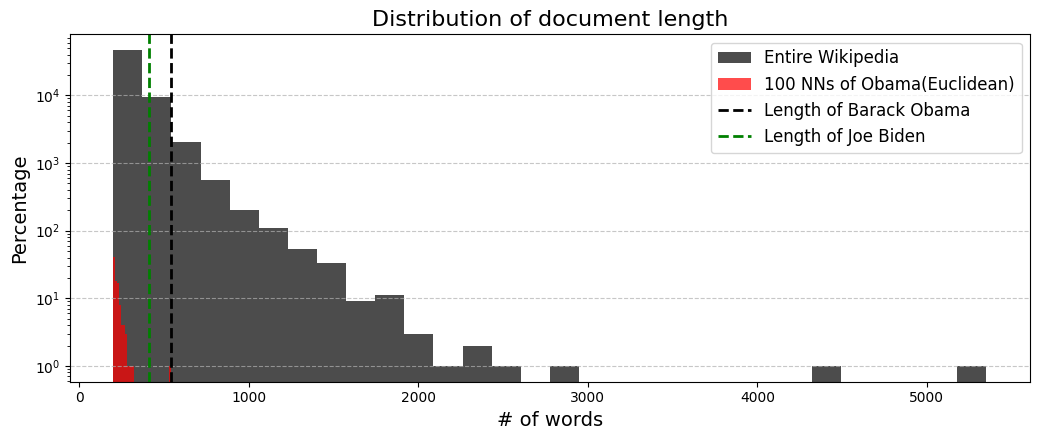

In [64]:
nearest_neighbors_euclidean = NearestNeighbors(n_neighbors=100, algorithm='brute', metric='euclidean').fit(TFIDFmatrix)
distances_e, indices_e = nearest_neighbors_euclidean.kneighbors(TFIDFmatrix[obama_index])
nearest_neighbors_lengths = wiki.loc[indices_e.flatten(), 'length']

plt.figure(figsize=(10.5,4.5))
plt.hist(wiki['length'], bins=30, color='black', alpha=0.7,label=f'Entire Wikipedia')
plt.hist(nearest_neighbors_lengths, bins=30, color='red', alpha=0.7, label=f'100 NNs of Obama(Euclidean)')
plt.axvline(wiki['length'][wiki['name']=='Barack Obama'].values[0], color='black', linestyle='dashed', linewidth=2, label=f'Length of Barack Obama')
plt.axvline(wiki['length'][wiki['name']=='Joe Biden'].values[0], color='green', linestyle='dashed', linewidth=2, label=f'Length of Joe Biden')
# Adding titles and labels
plt.title("Distribution of document length", fontsize=16)
plt.xlabel("# of words", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yscale('log')
plt.tight_layout()
plt.show()



Relative to the rest of Wikipedia, nearest neighbors of Obama are overwhemingly short, most of them being shorter than 300 words. The bias towards short articles is not appropriate in this application as there is really no reason to  favor short articles over long articles (they are all Wikipedia articles, after all). Many of the Wikipedia articles are 300 words or more, and both Obama and Biden are over 300 words long.

**Note**: For the interest of computation time, the dataset given here contains _excerpts_ of the articles rather than full text. For instance, the actual Wikipedia article about Obama is around 25000 words. Do not be surprised by the low numbers shown in the histogram.

**Note:** Both word-count features and TF-IDF are proportional to word frequencies. While TF-IDF penalizes very common words, longer articles tend to have longer TF-IDF vectors simply because they have more words in them.

To remove this bias, we turn to **cosine distances**:
$$
d(\mathbf{x},\mathbf{y}) = 1 - \frac{\mathbf{x}^T\mathbf{y}}{\|\mathbf{x}\| \|\mathbf{y}\|}
$$
Cosine distances let us compare word distributions of two articles of varying lengths.

**d)** Train a new nearest neighbor model, this time with cosine distances.  Then repeat the search for Obama's 100 nearest neighbors and make a plot to better visualize the effect of having used cosine distance in place of Euclidean on our TF-IDF vectors.

In [120]:
nearest_neighbors_cos = NearestNeighbors(n_neighbors=100, algorithm='brute', metric='cosine').fit(TFIDFmatrix)
distances_c, indices_c = nearest_neighbors_cos.kneighbors(TFIDFmatrix[obama_index])
nearest_neighbors_lengths_c = wiki.loc[indices_c.flatten(), 'length']
nearest_neighbors_lengths_c


,length
35817,540.0
24478,414.0
57108,580.0
38376,310.0
38714,255.0
...,...
2045,291.0
47085,326.0
16392,365.0
55495,2486.0


From a glance at the above table, things look better.  For example, we now see Joe Biden as Barack Obama's nearest neighbor!  We also see Hillary Clinton on the list.  This list looks even more plausible as nearest neighbors of Barack Obama.

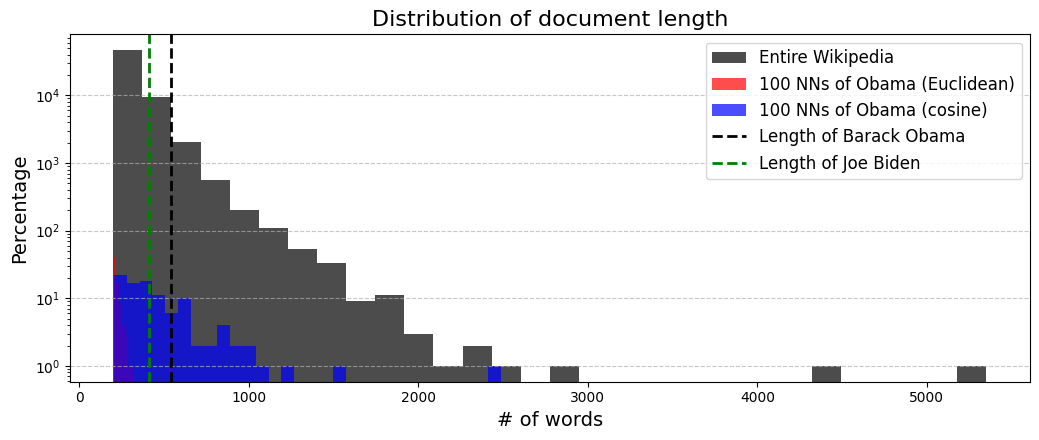

In [68]:
plt.figure(figsize=(10.5,4.5))
plt.hist(wiki['length'], bins=30, color='black', alpha=0.7,label=f'Entire Wikipedia')
plt.hist(nearest_neighbors_lengths, bins=30, color='red', alpha=0.7, label=f'100 NNs of Obama (Euclidean)')
plt.hist(nearest_neighbors_lengths_c, bins=30, color='blue', alpha=0.7, label=f'100 NNs of Obama (cosine)')
plt.axvline(wiki['length'][wiki['name']=='Barack Obama'].values[0], color='black', linestyle='dashed', linewidth=2, label=f'Length of Barack Obama')
plt.axvline(wiki['length'][wiki['name']=='Joe Biden'].values[0], color='green', linestyle='dashed', linewidth=2, label=f'Length of Joe Biden')
plt.title("Distribution of document length", fontsize=16)
plt.xlabel("# of words", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yscale('log')
plt.tight_layout()
plt.show()

Indeed, the 100 nearest neighbors using cosine distance provide a sampling across the range of document lengths, rather than just short articles like Euclidean distance provided.

**Moral of the story**: In deciding the features and distance measures, check if they produce results that make sense for your particular application.

## Ex. 5: Problem with cosine distances: tweets vs. long articles

Happily ever after? Not so fast. Cosine distances ignore all document lengths, which may be great in certain situations but not in others. For instance, consider the following (admittedly contrived) example.

```
+--------------------------------------------------------+
|                                             +--------+ |
|  One that shall not be named                | Follow | |
|  @username                                  +--------+ |
|                                                        |
|  Democratic governments control law in response to     |
|  popular act.                                          |
|                                                        |
|  8:05 AM - 16 May 2016                                 |
|                                                        |
|  Reply   Retweet (1,332)   Like (300)                  |
|                                                        |
+--------------------------------------------------------+
```

**a)** Transform the tweet into TF-IDF features, using the fit to the Wikipedia dataset. (That is, let's treat this tweet as an article in our Wikipedia dataset and see what happens.) How similar is this tweet to Barack Obama's Wikipedia article?

In [91]:
''' nie wiem dlaczego ale ten kod generuje tfid dla kazdego rowny 0.33
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.DataFrame({'text': ['democratic governments control law in response to popular act']})
tablica=df['text'].tolist()
tablica=(' '.join(tablica)).split()
DF=pd.DataFrame(columns=['word','count','tf_idf'])
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['text'])
feature_names = vectorizer.get_feature_names_out()

for i, word in enumerate(tablica):
    word_index = np.where(feature_names == word)[0][0]
    tf_idf_value = tfidf_matrix[0, word_index]
    DF.loc[i] = [tablica[i],tablica.count(tablica[i]),tf_idf_value]

DF.head(10)
'''
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample tweet
tweet_text = ['democratic governments control law in response to popular act']

# Create a new TfidfVectorizer (or use the one fitted on Wikipedia if available)
vectorizer = TfidfVectorizer()

# Assuming 'wiki['text']' contains the Wikipedia articles
# vectorizer.fit(wiki['text']) # If using the pre-fitted vectorizer from Wikipedia

# Fit the vectorizer on the Wikipedia data if not already done
vectorizer.fit(wiki['text'])

# Transform the tweet using the fitted vectorizer
tfidf_matrix = vectorizer.transform(tweet_text)

# Get feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame to store results
import pandas as pd
DF = pd.DataFrame(columns=['word', 'tf-idf'])

# Iterate through words and store TF-IDF values
for i, word in enumerate(tweet_text[0].split()): # Split the tweet into words
    try:
        word_index = np.where(feature_names == word)[0][0]
        tf_idf_value = tfidf_matrix[0, word_index]
        DF.loc[i] = [word, tf_idf_value]
    except IndexError:
        # Handle cases where a word is not in the Wikipedia vocabulary
        print(f"Word '{word}' not found in Wikipedia vocabulary")
        DF.loc[i] = [word, 0] # Assign 0 TF-IDF if not found

# Display the results
DF.head(9)

,word,tf-idf
0,democratic,0.344792
1,governments,0.434235
2,control,0.396798
3,law,0.290272
4,in,0.084129
5,response,0.442117
6,to,0.087994
7,popular,0.316377
8,act,0.374792


Let's compare this tweet's TF-IDF vectors  to Barack Obama's Wikipedia entry.

In [92]:
obama_tf_idf

,word,tf-idf_Obama
162,the,40
239,in,30
86,and,21
73,of,18
126,to,14
...,...,...
108,civil,1
109,included,1
110,full,1
112,reinvestment,1


**b)** Now, compute the cosine distance between the Barack Obama article and this tweet:

In [99]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import cosine_distances
from scipy.sparse import hstack, csr_matrix

# Load Wikipedia dataset
wiki = pd.read_csv('people_wiki.csv')

# Create CountVectorizer and TF-IDF transformer for Wikipedia data
vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b", stop_words=None, max_features=None)
WCmatrix = vectorizer.fit_transform(wiki['text'])
tfidf = TfidfTransformer(smooth_idf=False, norm=None)
TFIDFmatrix = tfidf.fit_transform(WCmatrix)

# Get Obama's index
obama_index = wiki[wiki['name'] == 'Barack Obama'].index[0]

# Sample tweet
tweet_text = ['democratic governments control law in response to popular act']

# Transform the tweet using the same vectorizer used for Wikipedia data
tfidf_matrix = vectorizer.transform(tweet_text)

# Get Obama's TF-IDF vector
obama_tfidf = TFIDFmatrix[obama_index]

# Calculate the difference in the number of features
diff = obama_tfidf.shape[1] - tfidf_matrix.shape[1]

# Pad the tweet's TF-IDF matrix with zeros
padding = csr_matrix((tfidf_matrix.shape[0], diff))
tfidf_matrix_padded = hstack([tfidf_matrix, padding])

# Calculate cosine distance
distance = cosine_distances(obama_tfidf, tfidf_matrix_padded)[0, 0]
print(f"Cosine distance between Obama's article and the tweet: {distance}")

Cosine distance between Obama's article and the tweet: 0.6472758094864396


Let's compare this distance to the distance between the Barack Obama article and all of its Wikipedia nearest neighbors:

In [107]:
# prompt: dokoncz to zadanie

# ... (previous code)

# Calculate cosine distance

for index, row in wiki.iterrows():
    article_tfidf = TFIDFmatrix[index]  # Get TF-IDF for the current article

    # Pad the article's TF-IDF matrix if necessary
    diff = obama_tfidf.shape[1] - article_tfidf.shape[1]
    if diff > 0:
        padding = csr_matrix((article_tfidf.shape[0], diff))
        article_tfidf_padded = hstack([article_tfidf, padding])
    else:
        article_tfidf_padded = article_tfidf

    distance = cosine_distances(obama_tfidf, article_tfidf_padded)[0, 0]  # Calculate distance
    wiki.loc[index, 'BO-td-idf-cos'] = distance

print(wiki[['name', 'BO-td-idf-cos']].head())


# ... (rest of the code)

                  name  BO-td-idf-cos
0        Digby Morrell       0.852661
1       Alfred J. Lewy       0.940245
2        Harpdog Brown       0.891711
3  Franz Rottensteiner       0.862918
4               G-Enka       0.944616


In [123]:


nearest_neighbors_cos = NearestNeighbors(n_neighbors=59071, algorithm='brute', metric='cosine').fit(TFIDFmatrix)
distances_c, indices_c = nearest_neighbors_cos.kneighbors(TFIDFmatrix[obama_index])
nearest_neighbors_lengths_c = wiki.loc[indices_c.flatten(), 'length']
wiki_sorted_by_length = wiki.sort_values(by='length', ascending=False)  # Sort by length
wiki_sorted_by_length.head(10)



,URI,name,text,BO-td-idf-cos,length
55495,<http://dbpedia.org/resource/Lokman_Singh_Karki>,Lokman Singh Karki,lokman singh karki nepali about this sound lis...,0.732608,2486.0
34450,<http://dbpedia.org/resource/Chris_Chivers>,Chris Chivers,canon chris chivers has been vicar of john keb...,0.728381,1535.0
18040,<http://dbpedia.org/resource/David_L._Aaron>,David L. Aaron,david laurence aaron born 21 august 1938 chica...,0.729883,1216.0
26459,<http://dbpedia.org/resource/Pedro_Nava_(polit...,Pedro Nava (politician),california state assembly member november 2004...,0.731343,1116.0
31318,<http://dbpedia.org/resource/M._Cherif_Bassiouni>,M. Cherif Bassiouni,mahmoud cherif bassiouni was born in cairo egy...,0.728091,1011.0
53474,<http://dbpedia.org/resource/John_M._Barry>,John M. Barry,john m barry c 19478 is an american author and...,0.701449,986.0
4262,<http://dbpedia.org/resource/Warren_L._Miller>,Warren L. Miller,warren l miller is a member and former chairma...,0.717837,896.0
37199,<http://dbpedia.org/resource/Barry_Sullivan_(l...,Barry Sullivan (lawyer),barry sullivan is a chicago lawyer and as of j...,0.673300,893.0
22304,<http://dbpedia.org/resource/Chung_Dong-young>,Chung Dong-young,chung dongyoung born july 27 1953 in sunchang ...,0.732785,886.0
25798,<http://dbpedia.org/resource/Sandro_Petrone>,Sandro Petrone,sandro petrone is a foreign war correspondent ...,0.713452,884.0


With cosine distances, the tweet is "nearer" to Barack Obama than most people! If someone is reading the Barack Obama Wikipedia page, would you want to recommend they read this tweet?
In practice, it is common to enforce maximum or minimum document lengths. After all, when someone is reading a long article from _The Atlantic_, you wouldn't recommend him/her a tweet.